In [36]:
from bs4 import BeautifulSoup
import requests    
import string
import plotly.express as px 
import pandas as pd 
from newspaper import Article
from textblob import TextBlob, Word
import nltk
from gensim.test.utils import common_texts
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize,word_tokenize
from gensim.models import Word2Vec
from gensim.models.ldamodel import LdaModel
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from nltk.tag import pos_tag
from gensim import corpora, models
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
#from sklearn.datasets import make_blobs
#from sklearn.cluster import KMeans
import math
import re
import urllib.request
from flatten_json import flatten
import json
nltk.download('wordnet')
#from gensim.test.utils import common_texts
#from gensim.corpora.dictionary import Dictionary

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sheld\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
boardhist = pd.read_csv('boardHistory.csv')

In [3]:
#boardcontent = boardhist.groupby('boardId').max()
idx = boardhist.groupby('boardId')['timestamp'].transform(max) == boardhist['timestamp']
boardContent=boardhist[idx].sort_values('timestamp').reset_index(drop=True)
boardContent

,boardId,id,content,timestamp
0,o9J_lzYgHyw=,-MigcvIlwwIPHmyItrHe,"[{'bounds': {'bottom': -226.5, 'height': 360, ...",2021-09-03T17:10:14.834460
1,o9J_ly0SnkM=,-MiwKqHj2kVot_d4HcE6,"[{'bounds': {'bottom': 250, 'height': 500, 'le...",2021-09-06T18:20:49.162007
2,o9J_ly0Snnk=,-MiwjDmrSMXwIEa4vAHJ,"[{'bounds': {'bottom': 250, 'height': 500, 'le...",2021-09-06T20:11:43.122383
3,o9J_ly0SnuI=,-Mix4EVjMzYoy9dpQ3Ew,"[{'bounds': {'bottom': 75.39431587763158, 'hei...",2021-09-06T21:47:53.225035
4,o9J_lyGIfzA=,-Mj7-_-yjpZFgBZfIzkK,"[{'bounds': {'bottom': 332.5, 'height': 360, '...",2021-09-09T00:43:19.932050
5,o9J_lzYurAk=,-MjBoFSyEgfk38K31ZBR,"[{'bounds': {'bottom': 132.60182767623996, 'he...",2021-09-09T23:07:35.998728
6,o9J_lyYiAJ0=,-MjBoFTYd41AVWYEiN4U,"[{'bounds': {'bottom': -195.5, 'height': 360, ...",2021-09-09T23:07:36.044019
7,o9J_lyGIfks=,-MjBoFUMAYEfq8Be7JK0,"[{'bounds': {'bottom': -248.5, 'height': 360, ...",2021-09-09T23:07:36.097950
8,o9J_lyYiALM=,-MjV8FLPvJOnQCgCwsNZ,"[{'bounds': {'bottom': 113.9999999999996, 'hei...",2021-09-13T17:12:07.764067
9,o9J_lx2--OQ=,-MjVjVKIHMzP5_NAfTC6,"[{'bounds': {'bottom': 68, 'height': 360, 'lef...",2021-09-13T19:59:14.734268


In [44]:
def getBoardContent(row):
    return eval(row['content'])

clusterTitles=[]
for i in range(len(boardContent)):
    board=getBoardContent(boardContent.iloc[i])
    clusterTitle = []
    for x in board:
        if 'metadata' in x:
            clientID = list(x['metadata'].keys())[0]
            if x['metadata'][clientID]['type'] == 'ClusterTitle':
                clusterTitle.append(x['plainText'])
    clusterTitles.append(clusterTitle)

# firstBoardText = [x['plainText'] for x in firstBoard if 'plainText' in x and x['plainText']!='' and '🔎︎' not in x['plainText']]
# firstBoardText = [x.split(' ') for x in firstBoardText]
boardContent['titles'] = clusterTitles
boardContent

,boardId,id,content,timestamp,titles
0,o9J_lzYgHyw=,-MigcvIlwwIPHmyItrHe,"[{'bounds': {'bottom': -226.5, 'height': 360, ...",2021-09-03T17:10:14.834460,[Billionare Space Race]
1,o9J_ly0SnkM=,-MiwKqHj2kVot_d4HcE6,"[{'bounds': {'bottom': 250, 'height': 500, 'le...",2021-09-06T18:20:49.162007,"[COVID-19, Environment Impacts]"
2,o9J_ly0Snnk=,-MiwjDmrSMXwIEa4vAHJ,"[{'bounds': {'bottom': 250, 'height': 500, 'le...",2021-09-06T20:11:43.122383,"[global commercial companies, Project Artemis]"
3,o9J_ly0SnuI=,-Mix4EVjMzYoy9dpQ3Ew,"[{'bounds': {'bottom': 75.39431587763158, 'hei...",2021-09-06T21:47:53.225035,"[face coverings, disposable, reusable (washabl..."
4,o9J_lyGIfzA=,-Mj7-_-yjpZFgBZfIzkK,"[{'bounds': {'bottom': 332.5, 'height': 360, '...",2021-09-09T00:43:19.932050,[]
5,o9J_lzYurAk=,-MjBoFSyEgfk38K31ZBR,"[{'bounds': {'bottom': 132.60182767623996, 'he...",2021-09-09T23:07:35.998728,"[ECONOMY, ENVIRONMENT]"
6,o9J_lyYiAJ0=,-MjBoFTYd41AVWYEiN4U,"[{'bounds': {'bottom': -195.5, 'height': 360, ...",2021-09-09T23:07:36.044019,[]
7,o9J_lyGIfks=,-MjBoFUMAYEfq8Be7JK0,"[{'bounds': {'bottom': -248.5, 'height': 360, ...",2021-09-09T23:07:36.097950,[NASA's CCP]
8,o9J_lyYiALM=,-MjV8FLPvJOnQCgCwsNZ,"[{'bounds': {'bottom': 113.9999999999996, 'hei...",2021-09-13T17:12:07.764067,"[basic information of space travel, The Future..."
9,o9J_lx2--OQ=,-MjVjVKIHMzP5_NAfTC6,"[{'bounds': {'bottom': 68, 'height': 360, 'lef...",2021-09-13T19:59:14.734268,"[National Space Agencies, Associated Technolog..."


# Getting website DOMs

In [20]:
#Get DOM of website, returned as BautifulSoup object
#USE THIS FUNCTION'S OUTPUT FOR OTHER FUNCTIONS 
def scrape_website(url):
    req = requests.get(url,verify=True)
    soup = BeautifulSoup(req.text, "html.parser")
    return soup #as parsed siteDocument

#Get p tags of BeautifulSoup object, used to parse webpages visited 
def get_site_article(beautifulSoupObj):
    texts=set()
    for link in beautifulSoupObj.find_all('p'):
        text = link.get_text()
        if text.strip():
            texts.add(link.get_text())
    return texts

#Get each result header from Google search page
def get_query_headers(beautifulSoupObj):
    texts=set()
    for link in beautifulSoupObj.find_all('div', class_='BNeawe vvjwJb AP7Wnd'):
        texts.add(link.get_text())
    return texts

#Get each result description from Google search page
def get_query_results_descriptions(beautifulSoupObj):
    texts=set()
    for link in beautifulSoupObj.find_all('div', class_='BNeawe s3v9rd AP7Wnd'):
        texts.add(link.get_text())
    return texts

#Get common questions section from Google search page
def get_query_common_questions(beautifulSoupObj):
    texts=set()
    for link in beautifulSoupObj.find_all('div', class_='Lt3Tzc'):
        texts.add(link.get_text())
    return texts

#Get query related searches from Google search page
def get_query_related_searches(beautifulSoupObj):
    texts=set()
    for link in beautifulSoupObj.find_all('div', class_='BNeawe s3v9rd AP7Wnd lRVwie'):
        texts.add(link.get_text())
    return texts

def get_query_hyperlinks(beautifulSoupObj):
    texts = set()
    for link in beautifulSoupObj.find_all('div', class_='ZINbbc xpd O9g5cc uUPGi'):
        a = link.find('a')
        #print(a)
        href = a['href']
        ind = href.find('&sa=')
        typeUrl = href[1: href.find('?')]
        if typeUrl=='url':
            if href.find('&sa=')!=-1:
                url = href[href.find('=')+1:href.find('&sa=')]
            else:
                url=href[href.find('=')+1:]
        elif typeUrl=='search':
            continue
#             if href.find('&sa=')!=-1:
#                 queryString = href[href.find('q=')+2:href.find('&sa=')]
#             else:
#                 queryString = href[href.find('q=')+2:]
#             url='https://www.google.com/search?q=' + queryString
        texts.add(url)
        
    return texts

def setToString(set):
    return '; '.join(set)

<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>environmental impacts of covid 19 - Google Search</title><script nonce="TadArCocsBx6ieAteiXBzg==">(function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){
var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}wind
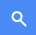
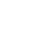
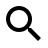
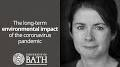
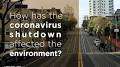

In [21]:
##UNCOMMENT to scrape queries
# testQueryBS = scrape_website('https://www.google.com/search?q=environmental+impacts+of+covid+19&num=100')
# testQueryBS

In [22]:
hyperlinks = get_query_hyperlinks(testQueryBS)
hyperlinks

{'http://science-union.org/articlelist/2020/11/16/the-environmental-impacts-of-covid-19-the-good-the-bad-and-the-innovative',
 'http://spaceref.com/covid-19/environmental-impacts-of-the-covid-19-pandemic-as-observed-from-space.html',
 'http://unece.org/covid-19-environment-and-climate-change',
 'https://abc7chicago.com/climate-change-covid-pandemic-building-a-better-chicago/11186872/',
 'https://annalsofglobalhealth.org/articles/10.5334/aogh.3104/',
 'https://arxiv.org/abs/2109.01037',
 'https://blog.padi.com/the-environmental-impact-of-the-coronavirus-pandemic/',
 'https://blog.worldfavor.com/environmental-impact-covid-19-the-bittersweet-benefits',
 'https://dailyutahchronicle.com/2021/10/01/buening-covid-19-environment/',
 'https://earth5r.org/impacts-corona-virus-environment/',
 'https://earthobservatory.nasa.gov/images/event/146381/environmental-effects-of-covid-19-quarantines',
 'https://ehjournal.biomedcentral.com/articles/10.1186/s12940-021-00716-z',
 'https://en.wikipedia.org/w

In [23]:
doms = []
for link in hyperlinks:
    try:
        page=requests.get(link)
    except requests.exceptions.RequestException as e:  # This is the correct syntax
        continue
    if page.status_code ==200:
        dom=scrape_website(link)
        doms.append(dom)
len(doms)

88

In [37]:
df= pd.DataFrame(doms)
df[0] = [str(x) for x in df[0]]
df.to_csv('envImpactCOVID19_doms.csv')

C:\Users\sheld\AppData\Roaming\Python\Python37\site-packages\pandas\core\internals\construction.py:540: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


In [32]:
import os
os.listdir()

['.ipynb_checkpoints',
 'AdminFirebase.ipynb',
 'aggTotals.csv',
 'Authentication',
 'boardHistory.csv',
 'boardInfo.csv',
 'browser_df.csv',
 'DataAnalysis',
 'DataCollection.ipynb',
 'DataCollectionToCSV.ipynb',
 'envImpactCOVID19_doms.csv',
 'NLPAlgorithm.ipynb',
 'query_df.csv',
 'reimagining-search-default-rtdb-board_history-export (3).json',
 'removingBoardHist.txt',
 'serviceAccountKey.json',
 'sidebarOpened.csv',
 'suggCircClicked.csv',
 'suggestion_df.csv',
 'Test1.ipynb',
 'TestMiro.ipynb',
 'visualizations',
 'webpage_df.csv',
 'WebScraping.ipynb',
 'widgets.csv',
 'word2vec.model']

# Get titles from SERP links

In [5]:
doms = pd.read_csv('envImpactCOVID19_doms.csv', index_col='Unnamed: 0')
doms = [BeautifulSoup(x, 'html.parser') for x in doms['0']]

In [6]:
doms[1].title.string.strip()

'How coronavirus quarantines have greatly reduced carbon emissions'

In [7]:

headlines = []
for dom in doms:
    if dom.title and dom.title.string:
        p = re.sub('\s+',' ',dom.title.string.strip())
        headlines.append(p)
headlines

['Environmental Impact of COVID-19',
 'How coronavirus quarantines have greatly reduced carbon emissions',
 'How has COVID-19 influenced the environment?',
 'Environmental spatial heterogeneity of the impacts of COVID-19 on the top-20 metropolitan cities of Asia-Pacific | Scientific Reports',
 'FSU researcher available to comment on unintended environmental impacts of COVID-19 - Florida State University News',
 '10 Impacts of Coronavirus on the Environment',
 'Environmental impacts of coronavirus crisis, challenges ahead | UNCTAD',
 'Environmental impact of COVID-19: Sustainable energy, climate, and societal shifts | Alumni & Friends',
 'Impact of the COVID-19 pandemic on the environment - Wikipedia',
 'How has COVID-19 increased plastic pollution?',
 'COVID-19, the environment and climate change | UNECE',
 'AG Healey Brief: Environmental Pollution Contributes to Disparate Impact of COVID-19 Pandemic on Communities of Color | Mass.gov',
 'Buening: COVID-19 Has Environmental Takeaways –

In [8]:
stemmer = PorterStemmer()
def lemmatize_stemming(text):
    return stemmer.stem(lemmatize_all(text))
def preprocess(text):
    result = []
    for token in simple_preprocess(text):
        #print(token)
        if token not in STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result
def lemmatize_all(sentence):
    wnl = WordNetLemmatizer()
    words = word_tokenize(sentence)
    words = [word for word in words if word.isalpha()]
    for word, tag in pos_tag(words):
        if tag.startswith("NN"):
            return wnl.lemmatize(word, pos='n')
        elif tag.startswith('VB'):
            return wnl.lemmatize(word, pos='v')
        elif tag.startswith('JJ'):
            return wnl.lemmatize(word, pos='a')
        else:
            return word
    return ''

In [9]:
processed_headlines = list(map(preprocess, headlines))
processed_headlines 

preprocessedclusterTitles=[' '.join(x) for x in clusterTitles]
processed_clustertitles = list(map(preprocess, preprocessedclusterTitles))
processed_headlines

[['environment', 'impact', 'covid'],
 ['coronaviru', 'quarantin', 'greatli', 'reduc', 'carbon', 'emiss'],
 ['covid', 'influenc', 'environ'],
 ['environment',
  'spatial',
  'heterogen',
  'impact',
  'covid',
  'metropolitan',
  'citi',
  'asia',
  'pacif',
  'scientif',
  'report'],
 ['research',
  'avail',
  'comment',
  'unintend',
  'environment',
  'impact',
  'covid',
  'florida',
  'state',
  'univers',
  'news'],
 ['impact', 'coronaviru', 'environ'],
 ['environment',
  'impact',
  'coronaviru',
  'crisi',
  'challeng',
  'ahead',
  'unctad'],
 ['environment',
  'impact',
  'covid',
  'sustain',
  'energi',
  'climat',
  'societ',
  'shift',
  'alumnu',
  'friend'],
 ['impact', 'covid', 'pandem', 'environ', 'wikipedia'],
 ['covid', 'increas', 'plastic', 'pollut'],
 ['covid', 'environ', 'climat', 'chang', 'unec'],
 ['healey',
  'brief',
  'environment',
  'pollut',
  'contribut',
  'dispar',
  'impact',
  'covid',
  'pandem',
  'commun',
  'color',
  'mass'],
 ['buen', 'covid', '

## Jaccard Similarity between link titles and Miro cluster titles

In [24]:
from sklearn.metrics import jaccard_score

def Jaccard_Similarity(doc1, doc2): 
    
    # List the unique words in a document
    words_doc1 = set(doc1) 
    words_doc2 = set(doc2)
    
    # Find the intersection of words list of doc1 & doc2
    intersection = words_doc1.intersection(words_doc2)

    # Find the union of words list of doc1 & doc2
    union = words_doc1.union(words_doc2)
        
    # Calculate Jaccard similarity score 
    # using length of intersection set divided by length of union set
    return float(len(intersection)) / len(union)

jaccard_sims = []
for board in preprocessedclusterTitles:
    board_sims=[]
    proc_board = preprocess(board)
    #print(proc_board)
    for headline in headlines:
        #print(headline)
        proc_headline = preprocess(headline)
        if Jaccard_Similarity(proc_board, proc_headline)!=0:
            board_sims.append((Jaccard_Similarity(proc_board, proc_headline), board, headline))
    jaccard_sims.append(board_sims)
jaccard_sims

[[(0.1111111111111111,
   'Billionare Space Race',
   'Environmental Impacts Of The COVID-19 Pandemic, As Observed From Space - SpaceRef'),
  (0.09090909090909091,
   'Billionare Space Race',
   'Environmental Impact of COVID-19 Lockdowns Seen from Space | Chicago News | WTTW')],
 [(0.5, 'COVID-19 Environment Impacts', 'Environmental Impact of COVID-19'),
  (0.5,
   'COVID-19 Environment Impacts',
   'How has COVID-19 influenced the environment?'),
  (0.16666666666666666,
   'COVID-19 Environment Impacts',
   'Environmental spatial heterogeneity of the impacts of COVID-19 on the top-20 metropolitan cities of Asia-Pacific | Scientific Reports'),
  (0.16666666666666666,
   'COVID-19 Environment Impacts',
   'FSU researcher available to comment on unintended environmental impacts of COVID-19 - Florida State University News'),
  (0.5,
   'COVID-19 Environment Impacts',
   '10 Impacts of Coronavirus on the Environment'),
  (0.1111111111111111,
   'COVID-19 Environment Impacts',
   'Environm

In [28]:
jaccard_sims_subset=[]
for i in range(len(jaccard_sims)):
    test=jaccard_sims[i]
    test.sort(reverse=True)
    jaccard_sims_subset.append([x for x in jaccard_sims[i] if x[0]!=1][:5])
jaccard_sims_subset

[[(0.1111111111111111,
   'Billionare Space Race',
   'Environmental Impacts Of The COVID-19 Pandemic, As Observed From Space - SpaceRef'),
  (0.09090909090909091,
   'Billionare Space Race',
   'Environmental Impact of COVID-19 Lockdowns Seen from Space | Chicago News | WTTW')],
 [(0.75,
   'COVID-19 Environment Impacts',
   'What impact will COVID-19 have on the environment? - Curious'),
  (0.6,
   'COVID-19 Environment Impacts',
   'Will Covid-19 have a lasting impact on the environment? - BBC Future'),
  (0.6,
   'COVID-19 Environment Impacts',
   'Impact of the COVID-19 pandemic on the environment - Wikipedia'),
  (0.5,
   'COVID-19 Environment Impacts',
   'Why COVID-19 will end up harming the environment'),
  (0.5,
   'COVID-19 Environment Impacts',
   'The Environmental Impact of COVID-19')],
 [(0.1,
   'global commercial companies Project Artemis',
   'Environmental consequences of COVID-19 on the global and Russian economics'),
  (0.08333333333333333,
   'global commercial co

## LDA on Headlines


In [267]:
count = 0
dictionary = corpora.Dictionary(processed_headlines)
#dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=100000)
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 avail
1 comment
2 covid
3 environment
4 florida
5 impact
6 news
7 research
8 state
9 unintend
10 univers


In [268]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_headlines]
bow_corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1)],
 [(11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1)],
 [(2, 1),
  (3, 1),
  (5, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1)],
 [(2, 1),
  (3, 1),
  (8, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1)],
 [(2, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1)],
 [(12, 1), (38, 1), (39, 2), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1)],
 [(2, 1), (5, 1), (31, 2), (45, 1), (46, 1), (47, 1), (48, 1)],
 [(10, 1), (11, 1), (16, 1), (19, 1), (49, 1), (50, 1), (51, 1)],
 [(2, 1),
  (3, 1),
  (31, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1)],
 [(2, 1), (3, 1), (5, 1), (60, 1)],
 [(2, 1),
  (3, 1),
  (5, 1),
  (7, 1),
  (26, 1),
  (31, 1),
  (39, 1),
  (40, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1)],
 [(3, 1), (5, 1), (12, 1),

In [304]:
bow_doc_2 = bow_corpus[0]
for i in range(len(bow_doc_2)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_2[i][0], 
                                            dictionary[bow_doc_2[i][0]], 
                                            bow_doc_2[i][1]))

Word 0 ("abl") appears 1 time.
Word 1 ("activ") appears 1 time.
Word 2 ("affect") appears 1 time.
Word 3 ("amass") appears 1 time.
Word 4 ("anna") appears 1 time.
Word 5 ("april") appears 1 time.
Word 6 ("articl") appears 1 time.
Word 7 ("atmospher") appears 1 time.
Word 8 ("attract") appears 1 time.
Word 9 ("avail") appears 1 time.
Word 10 ("away") appears 1 time.
Word 11 ("awesom") appears 1 time.
Word 12 ("beach") appears 3 time.
Word 13 ("best") appears 1 time.
Word 14 ("better") appears 1 time.
Word 15 ("bird") appears 1 time.
Word 16 ("breath") appears 2 time.
Word 17 ("bring") appears 1 time.
Word 18 ("brought") appears 1 time.
Word 19 ("burn") appears 1 time.
Word 20 ("carbon") appears 1 time.
Word 21 ("care") appears 1 time.
Word 22 ("chanc") appears 1 time.
Word 23 ("chang") appears 1 time.
Word 24 ("chanton") appears 3 time.
Word 25 ("child") appears 2 time.
Word 26 ("choos") appears 1 time.
Word 27 ("clean") appears 1 time.
Word 28 ("climat") appears 1 time.
Word 29 ("close

In [275]:
lda_model = models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [276]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.054*"environment" + 0.054*"covid" + 0.037*"impact" + 0.037*"planet" + 0.037*"tourism" + 0.019*"climat" + 0.019*"sustain" + 0.019*"implic" + 0.019*"shift" + 0.019*"pandem"
Topic: 1 
Words: 0.100*"environment" + 0.083*"covid" + 0.039*"effect" + 0.036*"sustain" + 0.027*"impact" + 0.020*"pandem" + 0.018*"chang" + 0.018*"health" + 0.018*"strategi" + 0.018*"anaesthesia"
Topic: 2 
Words: 0.081*"environment" + 0.069*"covid" + 0.037*"impact" + 0.035*"pandem" + 0.025*"coronaviru" + 0.025*"reduc" + 0.020*"effect" + 0.013*"institut" + 0.013*"futur" + 0.013*"big"
Topic: 3 
Words: 0.051*"impact" + 0.051*"covid" + 0.036*"environment" + 0.031*"environ" + 0.016*"coronaviru" + 0.016*"research" + 0.016*"pollut" + 0.016*"lockdown" + 0.016*"univers" + 0.016*"vehicl"
Topic: 4 
Words: 0.086*"environment" + 0.073*"covid" + 0.037*"effect" + 0.025*"sotirio" + 0.025*"consequ" + 0.013*"pandem" + 0.013*"immedi" + 0.013*"health" + 0.013*"panayiotid" + 0.013*"unexpect"
Topic: 5 
Words: 0.089*"covi

In [280]:
for index, score in sorted(lda_model[bow_corpus[0]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))

KeyError: '\\'

In [278]:
processed_headlines[0]

['research',
 'avail',
 'comment',
 'unintend',
 'environment',
 'impact',
 'covid',
 'florida',
 'state',
 'univers',
 'news']

## LDA on Website content

In [11]:
sites = []
for dom in doms:
    
    
    site = get_site_article(dom)
    sites.append(' '.join(site))
processed_sites = list(map(preprocess, sites))
processed_sites

[['section',
  'impact',
  'covid',
  'relat',
  'measur',
  'pollut',
  'influenc',
  'qualiti',
  'pandem',
  'fight',
  'plastic',
  'pollut',
  'covid',
  'pandem',
  'dispos',
  'mask',
  'glove',
  'protect',
  'equip',
  'soar',
  'plastic',
  'inher',
  'clean',
  'safe',
  'expert',
  'propos',
  'bring',
  'bring',
  'scheme',
  'agenc',
  'partner',
  'insist',
  'effect',
  'measur',
  'place',
  'plastic',
  'discard',
  'year',
  'significantli',
  'elimin',
  'outbreak',
  'covid',
  'research',
  'investig',
  'possibl',
  'link',
  'qualiti',
  'viru',
  'transmiss',
  'death',
  'rate',
  'find',
  'suggest',
  'pollut',
  'aggrav',
  'consequ',
  'covid',
  'resourc',
  'provid',
  'inform',
  'field',
  'unit',
  'pandem',
  'inform',
  'addit',
  'reliabl',
  'sourc',
  'covid',
  'pandem',
  'crisi',
  'affect',
  'spread',
  'covid',
  'close',
  'relat',
  'water',
  'sanit',
  'clean',
  'hand',
  'reduc',
  'transmiss',
  'help',
  'peopl',
  'stay',
  'health

In [322]:
count = 0
dictionary = corpora.Dictionary(processed_sites)
#dictionary.filter_extremes(no_below=5, no_above=0.5, keep_n=100000)
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

0 abl
1 activ
2 affect
3 amass
4 anna
5 april
6 articl
7 atmospher
8 attract
9 avail
10 away


In [323]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_sites]
bow_corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 2),
  (15, 2),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 2),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 2),
  (34, 1),
  (35, 1),
  (36, 2),
  (37, 1),
  (38, 1),
  (39, 2),
  (40, 2),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 2),
  (45, 2),
  (46, 1),
  (47, 2),
  (48, 1),
  (49, 2),
  (50, 1),
  (51, 1),
  (52, 4),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 2),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 2),
  (61, 5),
  (62, 1),
  (63, 3),
  (64, 1),
  (65, 2),
  (66, 2),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 2),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 2),
  (84, 2),
  (85, 1),
  (86, 1),
  (87, 2),
  (88, 5),
  (89, 1),
  (90, 1),
  (91, 1)

In [324]:
bow_doc_2 = bow_corpus[0]
for i in range(len(bow_doc_2)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_2[i][0], 
                                            dictionary[bow_doc_2[i][0]], 
                                            bow_doc_2[i][1]))

Word 0 ("abl") appears 1 time.
Word 1 ("affect") appears 1 time.
Word 2 ("april") appears 1 time.
Word 3 ("articl") appears 1 time.
Word 4 ("atmospher") appears 1 time.
Word 5 ("avail") appears 1 time.
Word 6 ("away") appears 1 time.
Word 7 ("best") appears 1 time.
Word 8 ("better") appears 1 time.
Word 9 ("burn") appears 1 time.
Word 10 ("carbon") appears 1 time.
Word 11 ("care") appears 1 time.
Word 12 ("clean") appears 1 time.
Word 13 ("climat") appears 1 time.
Word 14 ("close") appears 2 time.
Word 15 ("come") appears 2 time.
Word 16 ("commun") appears 1 time.
Word 17 ("consequ") appears 1 time.
Word 18 ("consid") appears 1 time.
Word 19 ("consumpt") appears 1 time.
Word 20 ("decad") appears 1 time.
Word 21 ("decreas") appears 1 time.
Word 22 ("depart") appears 1 time.
Word 23 ("develop") appears 1 time.
Word 24 ("differ") appears 1 time.
Word 25 ("dioxid") appears 1 time.
Word 26 ("drive") appears 1 time.
Word 27 ("earth") appears 2 time.
Word 28 ("economi") appears 1 time.
Word 2

In [325]:
lda_model = models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.035*"water" + 0.016*"qualiti" + 0.013*"human" + 0.012*"lockdown" + 0.011*"say" + 0.010*"countri" + 0.009*"level" + 0.009*"river" + 0.008*"studi" + 0.008*"industri"
Topic: 1 
Words: 0.017*"say" + 0.014*"climat" + 0.012*"wildlif" + 0.012*"natur" + 0.010*"report" + 0.010*"travel" + 0.009*"govern" + 0.009*"green" + 0.009*"carbon" + 0.008*"lockdown"
Topic: 2 
Words: 0.019*"climat" + 0.016*"citi" + 0.016*"lockdown" + 0.012*"energi" + 0.011*"level" + 0.011*"reduct" + 0.010*"qualiti" + 0.008*"studi" + 0.008*"china" + 0.008*"measur"
Topic: 3 
Words: 0.033*"wast" + 0.026*"plastic" + 0.013*"dispos" + 0.012*"mask" + 0.012*"ocean" + 0.012*"http" + 0.010*"gener" + 0.010*"countri" + 0.009*"water" + 0.009*"river"
Topic: 4 
Words: 0.022*"countri" + 0.012*"http" + 0.012*"model" + 0.012*"social" + 0.011*"studi" + 0.011*"infect" + 0.011*"case" + 0.011*"number" + 0.010*"high" + 0.010*"estim"
Topic: 5 
Words: 0.014*"lockdown" + 0.013*"countri" + 0.013*"wast" + 0.012*"industri" + 0.012*"wa

In [326]:
for index, score in sorted(lda_model[bow_corpus[2]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.327192097902298	 
Topic: 0.019*"climat" + 0.016*"citi" + 0.016*"lockdown" + 0.012*"energi" + 0.011*"level" + 0.011*"reduct" + 0.010*"qualiti" + 0.008*"studi" + 0.008*"china" + 0.008*"measur"

Score: 0.2949105501174927	 
Topic: 0.032*"food" + 0.028*"http" + 0.014*"countri" + 0.012*"crisi" + 0.012*"measur" + 0.012*"develop" + 0.010*"avail" + 0.010*"unit" + 0.010*"nation" + 0.010*"polici"

Score: 0.18931828439235687	 
Topic: 0.035*"water" + 0.016*"qualiti" + 0.013*"human" + 0.012*"lockdown" + 0.011*"say" + 0.010*"countri" + 0.009*"level" + 0.009*"river" + 0.008*"studi" + 0.008*"industri"

Score: 0.09314325451850891	 
Topic: 0.014*"lockdown" + 0.013*"countri" + 0.013*"wast" + 0.012*"industri" + 0.012*"water" + 0.011*"plastic" + 0.010*"qualiti" + 0.010*"studi" + 0.010*"reduct" + 0.009*"report"

Score: 0.06804242730140686	 
Topic: 0.033*"wast" + 0.026*"plastic" + 0.013*"dispos" + 0.012*"mask" + 0.012*"ocean" + 0.012*"http" + 0.010*"gener" + 0.010*"countri" + 0.009*"water" + 0.009*"

In [327]:
processed_sites[0]
sites[0]

'I see this as being an opportunity for us to really see what it would look like to slow down, what the effects might be and what the consequences will be if we don’t. It is just so visual to us right now.\xa0I think a lot of individuals are thinking the same thing, and I hope we are taking this opportunity to really consider our path.\xa0\xa0\xa0 FSU | Florida State University News To me this is an awesome window into reminding us who the original tenants of our beaches are. It is a pleasure to imagine other species, besides\xa0ourselves, being able to raise their young in their natural habitat.\xa0\xa0 Looking on the positive side of things, this pandemic is bringing our community together emphasizing sustainable activities. It will\xa0encourage\xa0us to reach out to our neighbors where we wouldn’t have otherwise.\xa0\xa0\xa0 We should treat this as an opportunity for people to learn more about each other and stop and breath. A social “pause.”\xa0\xa0\xa0 Across Florida we are closin

In [329]:
doms[0]
get_site_article(doms[0])

{'About FSU',
 'Across Florida we are closing beaches to reduce gatherings\xa0of people that may spread the virus. With the beaches closed, for the first time in decades, the shore birds that come to nest there\xa0will\xa0have a chance to raise their young without people driving, sunbathing and walking their dogs all over them.\xa0\xa0\xa0',
 'Are there lessons to be learned from this\xa0or will\xa0this not really matter in the long run in terms of\xa0emissions?\xa0',
 'As people around the world isolate in their homes to prevent the spread of COVID-19, research indicates\xa0there may be some positive environmental outcomes.',
 'By: Anna Prentiss | Published: April 8, 2020 |  12:44 pm |  SHARE: ',
 'Chanton\xa0explained how the change in people’s patterns because of the pandemic has affected emissions.\xa0His\xa0research\xa0focuses\xa0on greenhouse gas production and emission in wetlands, landfills and the deep sea.',
 'During his time at FSU,\xa0Chanton\xa0has amassed an impressive re

In [331]:
unseen_document='The short-term reductions in environmental pressures are significant; as the economy gradually recovers, emissions are projected to increase again, with growth rates going back to the pre-COVID baseline projection levels. But there is a long-term – potentially permanent – downward impact on the levels of environmental pressures of 1-3%, with stronger effects for pressures related to capital-intensive economic activities. This Brief was first published on 21 May 2021. This is a revised version that updates the right panel of Figure 4 to show results for 2025 instead of 2040 and that clarifies the reference to the associated Working Paper by Dellink et al.'
bow_vector = dictionary.doc2bow(preprocess(unseen_document))
for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

Score: 0.7256729006767273	 Topic: 0.017*"say" + 0.014*"climat" + 0.012*"wildlif" + 0.012*"natur" + 0.010*"report"
Score: 0.2395339459180832	 Topic: 0.022*"countri" + 0.012*"http" + 0.012*"model" + 0.012*"social" + 0.011*"studi"


# Building Word2Vec

In [438]:
def retrieve_page(page_name: str) -> list:
    '''
    Retrieves page data from page_name
    and stores words in lower case format in
    a list - tokenized format.
    '''
    # Strip puncuation from page
    page_name = re.sub(r'[^a-zA-Z\s]+', '', page_name)
    # Lower text case
    page_name = page_name.lower()
    # Tokenize using NLTK word tokenizer
    page_name = word_tokenize(page_name)
    return page_name

def build_vocabulary(page:list) -> dict:
    '''
    Builds vocabulary with all the words
    present in the list page.
    '''
    vocab = list(set(page))
    vocab.sort()
    
    vocab_dict = {}
    for index, word in enumerate(vocab):
        vocab_dict[word] = index
    return vocab_dict

In [439]:
pages=[]
wordslist = []
for site in sites:
    page = retrieve_page(site)
    if page is None:
        continue
    wordslist+=page
    pages.append(page)

vocab_dict = build_vocabulary(wordslist)

vocab_dict

{'a': 0,
 'aaas': 1,
 'aaron': 2,
 'ab': 3,
 'aba': 4,
 'abandon': 5,
 'abandoned': 6,
 'abandonment': 7,
 'abate': 8,
 'abates': 9,
 'abbas': 10,
 'abc': 11,
 'abdelkareem': 12,
 'abdication': 13,
 'abernethy': 14,
 'abide': 15,
 'abilene': 16,
 'abilities': 17,
 'ability': 18,
 'abinaya': 19,
 'able': 20,
 'abnett': 21,
 'abnormal': 22,
 'aboard': 23,
 'aboubakr': 24,
 'about': 25,
 'above': 26,
 'abrasion': 27,
 'abrogation': 28,
 'abrupt': 29,
 'absence': 30,
 'absent': 31,
 'absenteeism': 32,
 'absolute': 33,
 'absolutely': 34,
 'absorb': 35,
 'absorbed': 36,
 'absorbing': 37,
 'absorbs': 38,
 'absorption': 39,
 'abstract': 40,
 'abundance': 41,
 'abundantly': 42,
 'abusive': 43,
 'ac': 44,
 'academia': 45,
 'academic': 46,
 'academics': 47,
 'academy': 48,
 'acapulco': 49,
 'acceding': 50,
 'accelerate': 51,
 'accelerated': 52,
 'accelerates': 53,
 'accept': 54,
 'acceptable': 55,
 'accepted': 56,
 'accepting': 57,
 'access': 58,
 'accessed': 59,
 'accesses': 60,
 'accessibility'

In [440]:
co_ocurrence_vectors = pd.DataFrame(
    np.zeros([len(vocab_dict), len(vocab_dict)]),
    index = vocab_dict.keys(),
    columns = vocab_dict.keys()
)

def build_context(
    pages:list, 
    co_ocurrence_vectors: pd.DataFrame
) -> pd.DataFrame:
    '''
    Updates co-ocurrence vectors based on
    text read from the page.
    '''
    for page in pages:
        for index, element in enumerate(page):
            #print(element)
            # Build start and finish of context
            start = 0 if index-2 < 0 else index-2
            finish = len(page) if index+2 > len(page) else index+3
            # Retrieve Context for word
            context = page[start:index]+page[index+1:finish]
            for word in context:
                # Update Co-Occurrence Matrix 
                co_ocurrence_vectors.loc[element, word] = (
                    co_ocurrence_vectors.loc[element, word]+1
                )
            
    return co_ocurrence_vectors
co_ocurrence_vectors = build_context(pages, co_ocurrence_vectors)
co_ocurrence_vectors

,a,aaas,aaron,ab,aba,abandon,abandoned,abandonment,abate,abates,...,zoonotic,zoonotique,zooplankton,zoos,zrich,zt,zucchini,zurich,zw,zy
a,24.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aaas,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aaron,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ab,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zucchini,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zurich,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zw,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [442]:
co_ocurrence_vectors.loc['university'].sort_values(ascending=False).head(10)


of            39.0
the           23.0
at            13.0
state         11.0
colorado       7.0
british        7.0
from           7.0
and            6.0
florida        5.0
california     5.0
Name: university, dtype: float64

In [430]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_words = pd.DataFrame(
    cosine_similarity(co_ocurrence_vectors),
    columns = vocab_dict.keys(),
    index = vocab_dict.keys()
)
similarity_words

,0,00,0001187,0003,0005,0006,001,0013,0025,0029272,...,çerezlerle,ð,čurović,β,δ,εi,μg,μgm3,μm,⅔
0,1.000000,0.0,0.0,0.000000,0.0,0.117851,0.000000,0.000000,0.117851,0.0,...,0.0,0.0,0.000000,0.00,0.117851,0.117851,0.000000,0.000000,0.191495,0.000000
00,0.000000,1.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0001187,0.000000,0.0,1.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0003,0.000000,0.0,0.0,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.021713,0.000000
0005,0.000000,0.0,0.0,0.000000,1.0,0.000000,0.353553,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
εi,0.117851,0.0,0.0,0.000000,0.0,0.250000,0.000000,0.000000,0.250000,0.0,...,0.0,0.0,0.000000,0.25,0.000000,1.000000,0.000000,0.000000,0.162489,0.000000
μg,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.000000,0.00,0.000000,0.000000,1.000000,0.000000,0.081244,0.250000
μgm3,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.176777,0.000000,0.000000,0.0,...,0.0,0.0,0.176777,0.00,0.000000,0.000000,0.000000,1.000000,0.020311,0.250000
μm,0.191495,0.0,0.0,0.021713,0.0,0.162489,0.043086,0.040622,0.203111,0.0,...,0.0,0.0,0.000000,0.00,0.121867,0.162489,0.081244,0.020311,1.000000,0.101556


In [434]:
similarity_words.loc['economic'].sort_values(ascending=False).head(10)

economic          1.000000
other             0.848270
industrial        0.840568
environmental     0.836435
health            0.827360
development       0.820461
both              0.820312
transportation    0.818308
trade             0.801600
transport         0.796990
Name: economic, dtype: float64